In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''import zipfile
import os

zip_path = "/content/drive/MyDrive/Colab Notebooks/BirdsVsDrone/archive_7.zip"  # Update with your actual zip file path
extract_path = "/content/drive/MyDrive/Colab Notebooks/BirdsVsDrone/"  # Update with the desired extraction directory

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")'''

Dataset extracted successfully!


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
# Define dataset path
data_dir = "/content/drive/MyDrive/Colab Notebooks/BirdsVsDrone/dataset/"
split_dir = "/content/drive/MyDrive/Colab Notebooks/BirdsVsDrone/split_dir/"  # Path to store split data

# Split dataset into train (70%), validation (15%), and test (15%)
splitfolders.ratio(data_dir, output=split_dir, seed=42, ratio=(0.7, 0.15, 0.15))

# Define paths for train, validation, and test
data_train = f"{split_dir}/train"
data_val = f"{split_dir}/val"
data_test = f"{split_dir}/test"

# Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255, rotation_range=30, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest')

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

Copying files: 4106 files [01:47, 38.24 files/s]


In [ ]:
# Load data
train_generator = train_datagen.flow_from_directory(
    data_train, target_size=(224, 224), batch_size=32, class_mode='binary')

val_generator = val_test_datagen.flow_from_directory(
    data_val, target_size=(224, 224), batch_size=32, class_mode='binary')

test_generator = val_test_datagen.flow_from_directory(
    data_test, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

Found 2871 images belonging to 2 classes.
Found 615 images belonging to 2 classes.
Found 618 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

# Define CNN model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # Convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer
model.add(Dropout(0.3))  # Dropout to reduce overfitting

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.5838 - loss: 8.7143 - val_accuracy: 0.6715 - val_loss: 4.0625
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7144 - loss: 3.4788 - val_accuracy: 0.7089 - val_loss: 2.4179
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 89s 996ms/step - accuracy: 0.7719 - loss: 2.1196 - val_accuracy: 0.7301 - val_loss: 1.6880
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7931 - loss: 1.4873 - val_accuracy: 0.7642 - val_loss: 1.2712
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.8045 - loss: 1.1214 - val_accuracy: 0.7821 - val_loss: 1.0119
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 89s 995ms/step - accuracy: 0.8088 - loss: 0.8940 - val_accuracy: 0.7724 - val_loss: 0.8415
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8153 - loss: 0.7327 - val_accuracy: 0.7707 - val_loss: 0.7227
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.8196 - loss: 0.6504 - val_accuracy: 0.7854 - 

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 522ms/step - accuracy: 0.6225 - loss: 0.6631
Test Accuracy: 0.7945


In [ ]:
# Check the keys of the history object
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
# Save model
# model.save("bird_vs_drone_densenet.h5")

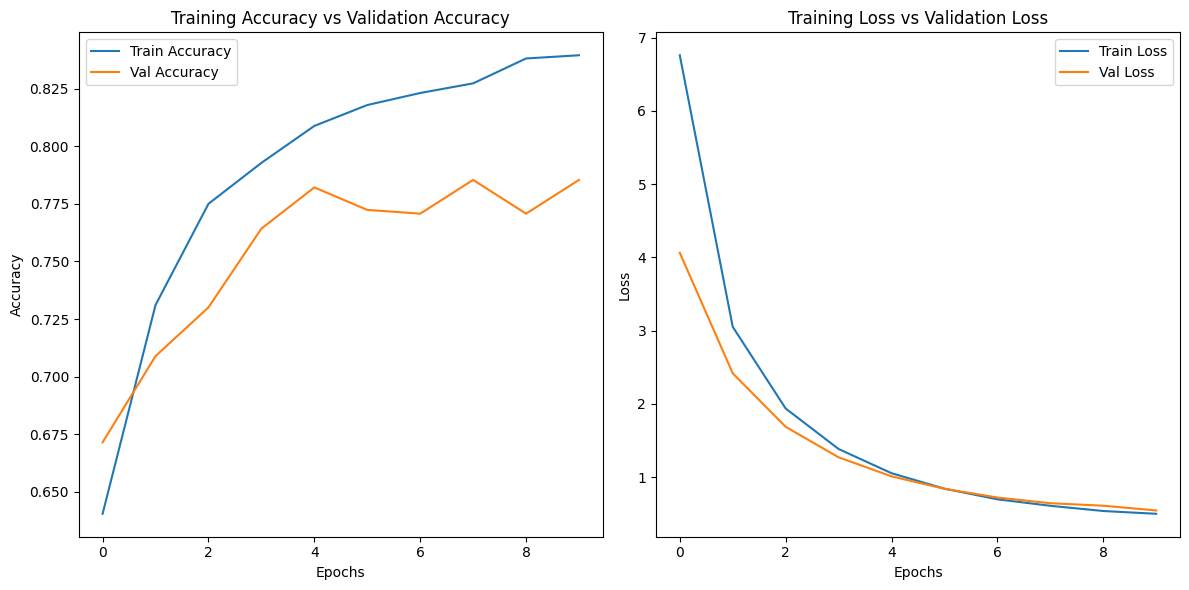

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit() previously
# If not already saved, you can retrieve it from the training process

# Plotting Training Accuracy vs Validation Accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 565ms/step


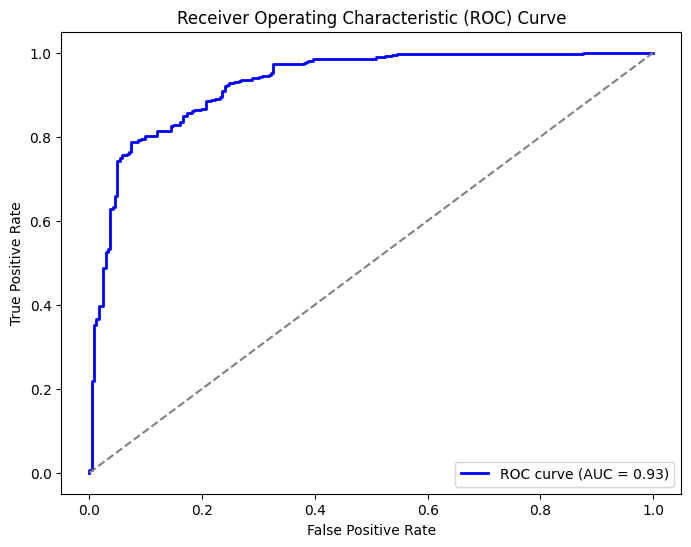

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the true labels and predicted probabilities
y_true = test_generator.classes  # Ground truth labels
y_pred_prob = model.predict(test_generator)  # Predicted probabilities

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Get the true labels and predicted classes
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")  # Convert probabilities to class labels

# Compute the F1 Score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 820ms/step
F1 Score: 0.8535


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Compute Precision and Recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.7536
Recall: 0.9840
